In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 2. Vectores (20 puntos)

## 1. (5 puntos) Graficación y propiedades de los vectores

### a) Usando Python grafique los siguientes vectores.

$\mathbf{v_1} = \begin{bmatrix} -0.3 \\ 0.4 \\ 0.1 \end{bmatrix}$, $\mathbf{v_2} = \begin{bmatrix} 0.5 \\ 0.2 \\ 0.1 \end{bmatrix}$, $\mathbf{v_3} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} \\ 0 \end{bmatrix}$

### b) Demuestre cuáles de los vectores anteriores son unitarios.

Considerando el vector tensor([-0.3000,  0.4000,  0.1000]), cuya magnitud es 0.5099019408226013, se concluye que no es unitario
Considerando el vector tensor([0.5000, 0.2000, 0.1000]), cuya magnitud es 0.5477225184440613, se concluye que no es unitario
Considerando el vector tensor([ 0.7071, -0.7071,  0.0000]), cuya magnitud es 0.9999999403953552, se concluye que es unitario


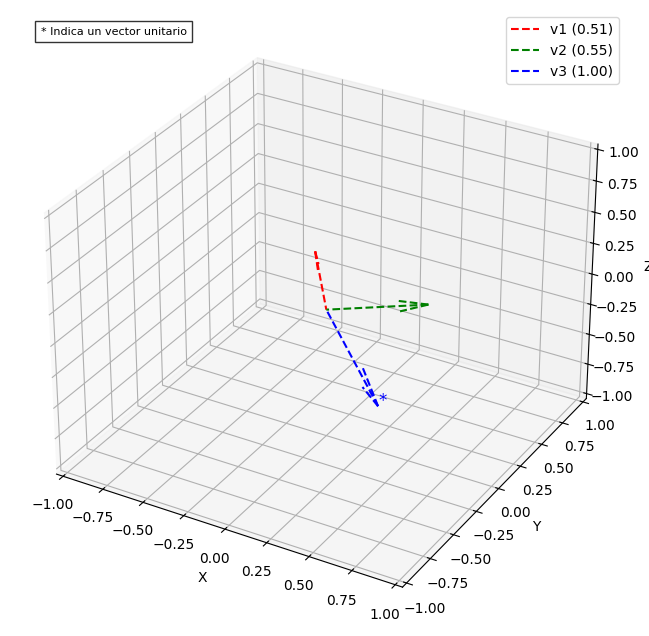

In [37]:
# Calcula magnitud del vector y determina si es unitario
def eval_unit_vec(v):
    mag_v = torch.norm(v)
    is_close = torch.isclose(mag_v, torch.tensor(1.0), atol=1e-5)
    print(f'Considerando el vector {v}, cuya magnitud es {mag_v.item()}, se concluye que {"es" if is_close else "no es"} unitario')
    return mag_v.item(), is_close

# Toma un arreglo de vectores y lo presenta en una figura tridimensional
def plot_vectors(vectors):
    fig = plt.figure(figsize=(10, 8), dpi=100)
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i, v in enumerate(vectors):
        # Por cada vector se evalúa, grafica y añade * en caso de ser unitario
        tv = torch.tensor(v, dtype=torch.float32)
        mag_v, is_unitary = eval_unit_vec(tv)
        color = colors[i % len(colors)]
        ax.quiver(0, 0, 0, tv[0], tv[1], tv[2], color=color, linestyle='--', label=f'v{i+1} ({mag_v:.2f})')
        if is_unitary:
            ax.text(tv[0], tv[1], tv[2], '*', color=color, fontsize=12)

    ax.set_xlabel('X')
    ax.set_xlim([-1, 1])
    ax.set_ylabel('Y')
    ax.set_ylim([-1, 1])
    ax.set_zlabel('Z')
    ax.set_zlim([-1, 1])

    ax.legend()
    plt.figtext(0.05, 0.96, '* Indica un vector unitario', transform=ax.transAxes, fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

# Lista de vectores
vectors = [[-0.3, 0.4, 0.1], [0.5, 0.2, 0.1], [1/np.sqrt(2), -1/np.sqrt(2), 0]]
plot_vectors(vectors)

## 2. (15 puntos) Propiedades del producto punto

Demuestre las siguientes propiedades. Además, muestrelo con una implementación en Pytorch, usando como entrada un arreglo de 50 valores generados al azar, adjunte un pantallazo con la salida de la comparación del resultado a ambos lados de la igualdad, o en su defecto, demuestre el no cumplimiento de la propiedad con un contraejemplo.

In [2]:
# Generar vectores aleatorios
u = torch.rand(50)
v = torch.rand(50)
w = torch.rand(50)

# Generar escalar aleatorio
r = torch.rand(1).item()

### P1) $\mathbf{u} \cdot \mathbf{v} = \mathbf{v} \cdot \mathbf{u}$

In [3]:
# Calcular el producto punto
dot_uv = torch.dot(u, v)
dot_vu = torch.dot(v, u)

print(f"u · v = {dot_uv.item()}")
print(f"v · u = {dot_vu.item()}")
print(f"Conmutatividad cumple: {torch.isclose(dot_uv, dot_vu)}")

u · v = 13.014402389526367
v · u = 13.014402389526367
Conmutatividad cumple: True


### P2) $\mathbf{u} \cdot (\mathbf{v} + \mathbf{w}) = \mathbf{u} \cdot \mathbf{v} + \mathbf{u} \cdot \mathbf{w}$

In [4]:
# Calcular el producto punto
dot_u_v_p_w = torch.dot(u, v + w)
dot_uv = torch.dot(u, v)
dot_uw = torch.dot(u, w)

print(f"u · (v + w) = {dot_u_v_p_w.item()}")
print(f"u · v + u · w = {dot_uv.item() + dot_uw.item()}")
print(f"Distributividad cumple: {torch.isclose(dot_u_v_p_w, dot_uv + dot_uw)}")

u · (v + w) = 28.568178176879883
u · v + u · w = 28.56817626953125
Distributividad cumple: True


### P3) $(r \mathbf{u}) \cdot \mathbf{v} = r (\mathbf{u} \cdot \mathbf{v})$

In [5]:
# Calcular el producto punto
dot_r_u_v = torch.dot(r * u, v)
dot_u_v = torch.dot(u, v)
r_dot_uv = r * dot_u_v

print(f"(r * u) · v = {dot_r_u_v.item()}")
print(f"r * (u · v) = {r_dot_uv.item()}")
print(f"Multiplicación por escalar cumple: {torch.isclose(dot_r_u_v, r_dot_uv)}")

(r * u) · v = 10.28683853149414
r * (u · v) = 10.28683853149414
Multiplicación por escalar cumple: True


### a) $\mathbf{u} \cdot (r \mathbf{v} + \mathbf{w}) = r (\mathbf{u} \cdot \mathbf{v}) + (\mathbf{u} \cdot \mathbf{w})$

In [6]:
# Calcular el producto punto
dot_u_r_v_p_w = torch.dot(u, r * v + w)
r_dot_uv = r * torch.dot(u, v)
dot_u_w = torch.dot(u, w)
result = r_dot_uv + dot_u_w

print(f"u · (r * v + w) = {dot_u_r_v_p_w.item()}")
print(f"r * (u · v) + (u · w) = {result.item()}")
print(f"Distributividad sobre la suma y escalar: {torch.isclose(dot_u_r_v_p_w, result)}")

u · (r * v + w) = 25.840614318847656
r * (u · v) + (u · w) = 25.840612411499023
Distributividad sobre la suma y escalar: True


### b) $\mathbf{u} \cdot (\mathbf{v} \cdot \mathbf{w}) \neq (\mathbf{u} \cdot \mathbf{v}) \cdot \mathbf{w}$

Esta primera alternativa no es factible ya que se incumplen los requisitos del operador (**consola arroja un error**):

In [7]:
# Calcular el producto punto
dot_uv_w = torch.dot(u, torch.dot(v, w))
dot_u_v_dot_w = torch.dot(torch.dot(u, v), w)

print(f"u · (v · w) = {dot_uv_w.item()}")
print(f"(u · v) · w = {dot_u_v_dot_w.item()}")
print(f"Asociatividad cumple: {torch.isclose(dot_uv_w, dot_u_v_dot_w)}")

RuntimeError: 1D tensors expected, but got 1D and 0D tensors

Esta alternativa asume una multiplicación entre el escalar resultante del producto punto y el vector excluído (*u* en el primer caso, *w* en el segundo):

In [8]:
# Calcular el producto punto
dot_uv_w = u * torch.dot(v, w).item()
dot_u_v_dot_w = torch.dot(u, v).item() * w

print(f"u * (v · w) = {dot_uv_w}")
print(f"(u · v) * w = {dot_u_v_dot_w}")
compare_vectors = torch.allclose(dot_uv_w, dot_u_v_dot_w, rtol=1e-5, atol=1e-8)
print(f"Asociatividad cumple: {compare_vectors}")

u * (v · w) = tensor([ 5.2004,  1.8465,  4.0598,  8.4940,  7.3160,  3.9108,  6.9364,  1.1089,
         7.7678,  8.4213, 12.8140,  9.3583,  5.7158, 11.8077, 11.2251,  9.0907,
         6.3531, 11.2350,  2.3977, 10.8078,  3.9560, 10.0290,  9.1984,  9.7882,
         5.7095,  6.7016,  1.4831,  1.3565,  9.5772,  4.0705,  4.8923,  2.0033,
         8.5814, 10.0672,  9.0177,  3.4351, 11.5927,  0.6206,  1.9212,  4.9786,
        10.0402,  3.1420,  8.3234, 10.7319, 10.2621,  5.2403,  0.5391,  9.2494,
         9.8043, 11.5759])
(u · v) * w = tensor([ 4.3005,  5.5607,  9.1774,  3.7265,  7.7479,  0.7914,  6.6909, 10.4043,
         8.2803,  6.9541,  0.3790,  5.9675,  8.2958, 10.0988,  3.6630,  7.7503,
         4.8988,  9.6043,  6.0584,  8.2298,  3.0009, 12.9015, 11.5620, 12.5870,
         0.2562,  7.0523,  5.3444,  8.6081,  5.5618,  6.4828, 10.6026,  9.7157,
        12.5855, 11.4973, 11.2574,  6.5498, 12.6182, 12.2214,  3.2008, 11.6898,
        12.6560,  3.3989,  3.3404,  3.1903,  0.7170, 12.6289,  8.